In [26]:
import os
import urllib.request
import zipfile

from matplotlib import pyplot as plt
from matplotlib import image as img

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation

In [5]:
train_url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip'
test_url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip'

train_file_name = '../data/rps.zip'
test_file_name = '../data/rps-test.zip'

train_dir = '../data/rsp/training/'
test_dir = '../data/rsp/testing/'

urllib.request.urlretrieve(train_url, train_file_name)
urllib.request.urlretrieve(test_url, test_file_name)

zip_ref_train = zipfile.ZipFile(train_file_name, 'r')
zip_ref_train.extractall(train_dir)
zip_ref_train.close()

zip_ref_test = zipfile.ZipFile(test_file_name, 'r')
zip_ref_test.extractall(test_dir)
zip_ref_test.close()

In [15]:
rock_dir = os.path.join('../data/rsp/training/rps/paper/')
paper_dir = os.path.join('../data/rsp/training/rps/rock/')
scissor_dir = os.path.join('../data/rsp/training/rps/scissors/')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissor_dir)))

total training rock images: 840
total training paper images: 840
total training scissors images: 840


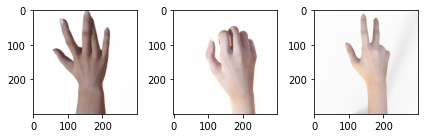

In [25]:
ctr = 0
rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissor_files = os.listdir(scissor_dir)

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[:1]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[:1]]
next_scissor = [os.path.join(scissor_dir, fname) for fname in scissor_files[:1]]

for i, img_path in enumerate(next_rock + next_paper + next_scissor):
    ctr += 1

    plt.subplot(1, 3, ctr)
    image = img.imread(img_path)
    plt.imshow(image)

plt.tight_layout()

In [27]:
model = Sequential()

# 1st convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 4th convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten
model.add(Flatten())

# input layer
model.add(Dense(512))
model.add(Activation('relu'))

# output layer
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        3